# Predicting Car Sales at Green Kia Dodge Subaru

## Table of Contents

1. Import CSV <br>
2. Exploratory Data Analysis and Data Cleaning <br>

In [1]:
#import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Import CSV

In [2]:
#read in csv

df = pd.read_csv("/Users/humzakhan/Metis/Metis_Projects/Metis_Project_5/All Sold Customers.csv")
df.head()

,Postal Code,VIN,Stock Num,MSRP,Year,Make,Model,Ext. Warranty Miles,Lender,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,KNAFK4A66E5066042,K28238A,"$18,315.00",2014,KIA,FORTE,100391,HEARTLAND CREDIT UNION,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,3C4PDCAB3HT601812,29220,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,NaN,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,4S3BMCC6XC3018572,43784,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,CONVERSION - DO NOT USE,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,3C4PDCAB2HT602126,29320,"$24,680.00",2017,DODGE,JOURNEY,0,ALLY FINANCIAL,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,5XYKT3A16DG361547,44718B,"$18,994.00",2013,KIA,SORENTO,0,HEARTLAND CREDIT UNION,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


## Exploratory Data Analysis and Data Cleaning

In [3]:
df.shape

(16627, 13)

In [4]:
df.columns

Index(['Postal Code', 'VIN', 'Stock Num', 'MSRP', 'Year', 'Make', 'Model',
       'Ext. Warranty Miles', 'Lender', 'Purchase Date', 'Sales Type',
       'Purchase Type', 'Sale Price'],
      dtype='object')

In [5]:
df.dtypes

Postal Code            object
VIN                    object
Stock Num              object
MSRP                   object
Year                    int64
Make                   object
Model                  object
Ext. Warranty Miles     int64
Lender                 object
Purchase Date          object
Sales Type             object
Purchase Type          object
Sale Price             object
dtype: object

In [6]:
#will only show numerical columns

df.describe()

,Year,Ext. Warranty Miles
count,16627.000000,16627.000000
mean,2012.661394,27204.383593
std,4.660994,42452.372353
min,1984.000000,0.000000
25%,2010.000000,0.000000
50%,2013.000000,0.000000
75%,2016.000000,75000.000000
max,2021.000000,999999.000000


In [7]:
#check for null values

df.isnull().values.any()

True

In [8]:
#sum of null values in each column

df.isnull().sum()

Postal Code               0
VIN                       0
Stock Num               246
MSRP                      0
Year                      0
Make                      0
Model                     0
Ext. Warranty Miles       0
Lender                 1541
Purchase Date             0
Sales Type              217
Purchase Type           217
Sale Price                0
dtype: int64

In [9]:
#dropping null values in Purchase Type column. Entire row does not have data on car purchase

df = df.dropna(subset=['Purchase Type'])
df.shape

(16410, 13)

In [10]:
#show top 5 rows

df.head()

,Postal Code,VIN,Stock Num,MSRP,Year,Make,Model,Ext. Warranty Miles,Lender,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,KNAFK4A66E5066042,K28238A,"$18,315.00",2014,KIA,FORTE,100391,HEARTLAND CREDIT UNION,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,3C4PDCAB3HT601812,29220,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,NaN,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,4S3BMCC6XC3018572,43784,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,CONVERSION - DO NOT USE,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,3C4PDCAB2HT602126,29320,"$24,680.00",2017,DODGE,JOURNEY,0,ALLY FINANCIAL,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,5XYKT3A16DG361547,44718B,"$18,994.00",2013,KIA,SORENTO,0,HEARTLAND CREDIT UNION,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [11]:
#replacing null values in LENDER column with Cash

df["Lender"].fillna("Cash", inplace = True)
df.head()

,Postal Code,VIN,Stock Num,MSRP,Year,Make,Model,Ext. Warranty Miles,Lender,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,KNAFK4A66E5066042,K28238A,"$18,315.00",2014,KIA,FORTE,100391,HEARTLAND CREDIT UNION,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,3C4PDCAB3HT601812,29220,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,Cash,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,4S3BMCC6XC3018572,43784,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,CONVERSION - DO NOT USE,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,3C4PDCAB2HT602126,29320,"$24,680.00",2017,DODGE,JOURNEY,0,ALLY FINANCIAL,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,5XYKT3A16DG361547,44718B,"$18,994.00",2013,KIA,SORENTO,0,HEARTLAND CREDIT UNION,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [12]:
#recheck sum of null values in each column

df.isnull().sum()

Postal Code             0
VIN                     0
Stock Num              29
MSRP                    0
Year                    0
Make                    0
Model                   0
Ext. Warranty Miles     0
Lender                  0
Purchase Date           0
Sales Type              0
Purchase Type           0
Sale Price              0
dtype: int64

In [13]:
#dropping VIN, Model and Stock columns

df = df.drop(columns=['VIN','Stock Num','Lender'])

In [14]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [15]:
# #overwriting column with CONVERSION - DO NOT USE with Cash
# df["Lender"] = df["Lender"].replace("CONVERSION - DO NOT USE", "Cash")

# #creating filter
# filter = df["Lender"] == "Cash"

# #printing only filtered columns
# df.where(filter).dropna()

In [16]:
#checking to see if change worked
#df.Lender

In [17]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [18]:
#create new column in df called warranty miles that takes existing column ext. warranty miles inputs 1 or 0

df["Warranty Miles"] = np.where(df["Ext. Warranty Miles"] > 0, 1, 0)
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [19]:
df.Make.unique()

array(['KIA', 'DODGE', 'SUBARU', 'DODGE TRUCK', 'RAM', 'CHRYSLER',
       'VOLKSWAGEN', 'JEEP', 'FORD', 'HONDA', 'GMC', 'CHEVROLET',
       'TOYOTA', 'NISSAN', 'HYUNDAI', 'MITSUBISHI', 'TOYOTA TRUCK',
       'MAZDA', 'MERCURY', 'BUICK', 'CADILLAC', 'FORD TRUCK',
       'CHEVROLET TRUCK', 'MERCEDES-BENZ', 'MERCURY TRUCK', 'SATURN',
       'NISSAN TRUCK', 'PONTIAC', 'LINCOLN', 'FIAT', 'MINI', 'BMW SAV',
       'VOLVO', 'LINCOLN TRUCK', 'LEXUS', 'OLDSMOBILE', 'BMW', 'SUZUKI',
       'INFINITI', 'LAND ROVER', 'JAGUAR', 'ACURA', 'CADILLAC TRUCK',
       'AUDI', 'PLYMOUTH', 'HUMMER', 'SAAB', 'SUZUKI MPV', 'OTHER MAKE',
       'HARLEY DAVIDSON', 'MV', 'PORSCHE', 'VICTORY', 'MAZDA TRUCK',
       'DAEWOO', 'BIG DOG', 'MINI COOPER', 'SUZUKI MC', 'KAWASAKI',
       'Toyota', 'Subaru', 'Kia', 'Ram', 'Chevrolet', 'Hyundai', 'ISUZU',
       'YAMAHA', 'EAGLE', 'SCION', 'Jeep', 'Dodge', 'Ford', 'Nissan',
       'Honda', 'Mitsubishi', 'Chrysler', 'Mercedes-Benz',
       'Harley-Davidson', 'Acura', 'Bui

In [20]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [21]:
#create list for all cars
all_cars = list(df.Make.unique())

all_cars

['KIA',
 'DODGE',
 'SUBARU',
 'DODGE TRUCK',
 'RAM',
 'CHRYSLER',
 'VOLKSWAGEN',
 'JEEP',
 'FORD',
 'HONDA',
 'GMC',
 'CHEVROLET',
 'TOYOTA',
 'NISSAN',
 'HYUNDAI',
 'MITSUBISHI',
 'TOYOTA TRUCK',
 'MAZDA',
 'MERCURY',
 'BUICK',
 'CADILLAC',
 'FORD TRUCK',
 'CHEVROLET TRUCK',
 'MERCEDES-BENZ',
 'MERCURY TRUCK',
 'SATURN',
 'NISSAN TRUCK',
 'PONTIAC',
 'LINCOLN',
 'FIAT',
 'MINI',
 'BMW SAV',
 'VOLVO',
 'LINCOLN TRUCK',
 'LEXUS',
 'OLDSMOBILE',
 'BMW',
 'SUZUKI',
 'INFINITI',
 'LAND ROVER',
 'JAGUAR',
 'ACURA',
 'CADILLAC TRUCK',
 'AUDI',
 'PLYMOUTH',
 'HUMMER',
 'SAAB',
 'SUZUKI MPV',
 'OTHER MAKE',
 'HARLEY DAVIDSON',
 'MV',
 'PORSCHE',
 'VICTORY',
 'MAZDA TRUCK',
 'DAEWOO',
 'BIG DOG',
 'MINI COOPER',
 'SUZUKI MC',
 'KAWASAKI',
 'Toyota',
 'Subaru',
 'Kia',
 'Ram',
 'Chevrolet',
 'Hyundai',
 'ISUZU',
 'YAMAHA',
 'EAGLE',
 'SCION',
 'Jeep',
 'Dodge',
 'Ford',
 'Nissan',
 'Honda',
 'Mitsubishi',
 'Chrysler',
 'Mercedes-Benz',
 'Harley-Davidson',
 'Acura',
 'Buick',
 'Mazda',
 'Volkswag

In [22]:
#consolidate all brands into five categories: KIA, SUBARU, DODGE, RAM, OTHER

for car in all_cars:
    if car == "KIA" or car == "Kia":
        df.Make.replace(car, 'KIA', inplace=True)
    elif car == "DODGE" or car == "Dodge":
        df.Make.replace(car, 'DODGE', inplace=True)
    elif car == "SUBARU" or car == "Subaru":
        df.Make.replace(car, 'SUBARU', inplace=True)
    elif car == "DODGE TRUCK" or car == "RAM" or car == "Ram":
        df.Make.replace(car, 'RAM', inplace=True)
    else:
        df.Make.replace(car, 'OTHER', inplace=True)
df.Make.unique()

array(['KIA', 'DODGE', 'SUBARU', 'RAM', 'OTHER'], dtype=object)

In [23]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [24]:
del df['Ext. Warranty Miles']

In [25]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [26]:
df['Zipcode'] = df['Postal Code'].str.split('-').str[0]
df.head()

,Postal Code,MSRP,Year,Make,Model,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles,Zipcode
0,62702-3468,"$18,315.00",2014,KIA,FORTE,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1,62702
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1,62704
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1,62711
3,62563,"$24,680.00",2017,DODGE,JOURNEY,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0,62563
4,62668,"$18,994.00",2013,KIA,SORENTO,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0,62668


In [27]:
del df['Postal Code']
df.head()

,MSRP,Year,Make,Model,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles,Zipcode
0,"$18,315.00",2014,KIA,FORTE,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1,62702
1,"$22,339.00",2017,DODGE,JOURNEY (2.4L),3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1,62704
2,"$23,500.00",2012,SUBARU,LEGACY 2.5I,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1,62711
3,"$24,680.00",2017,DODGE,JOURNEY,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0,62563
4,"$18,994.00",2013,KIA,SORENTO,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0,62668


In [28]:
#copy Model column
df['Model Type'] = df['Model']

#make upper case
df['Model Type'] = df['Model Type'].str.upper()

#create list
models = list(df['Model Type'].unique())
models

['FORTE',
 'JOURNEY (2.4L)',
 'LEGACY 2.5I',
 'JOURNEY',
 'SORENTO',
 'RAM 1500',
 'GRAND CARAVAN',
 'OUTBACK',
 'IMPREZA WAGON',
 'CROSSTREK',
 'OUTBACK 2.5I',
 'ASCENT',
 'OPTIMA',
 'SEDONA',
 '2500',
 'SOUL',
 '2500 (6.4L)',
 'LEGACY',
 'FORESTER',
 'PACIFICA',
 '1500',
 'GRAND CARAVAN (3.6L)',
 'IMPREZA',
 'CHARGER',
 'BEETLE COUPE',
 'OUTBACK WAGON',
 'COMPASS (2.4L)',
 'ESCAPE',
 'F-150',
 'CHALLENGER',
 'NIRO',
 '1500 (5.7L)',
 'AVENGER',
 'RAM P/U 1500',
 'SPORTAGE',
 'RIDGELINE',
 'FORESTER 2.5X',
 'SIERRA 1500',
 '1500 DIESEL (3.0L)',
 'DURANGO',
 'AVALANCHE',
 'PATRIOT (2.0L)',
 'COLORADO',
 'C-HR',
 'WRX',
 'CAMARO',
 'RAM 1500 (3.7L)',
 'FORESTER 2.5I',
 'RAM CARGO VAN',
 'ALTIMA',
 'SONATA',
 'XV CROSSTREK',
 'GRAND CHEROKEE (3.6L)',
 '2500 DIESEL (6.7L)',
 'DURANGO (3.6L)',
 'EXPEDITION',
 'SILVERADO 1500',
 'RAM 2500',
 'RIO',
 'AMANTI',
 'TOWN & COUNTRY (3.6L)',
 'CHALLENGER (3.6L)',
 'OUTLANDER SPORT',
 '3500 CHASSIS CAB',
 'BORREGO',
 'CALIBER',
 'OPTIMA HYBRID',
 'E

In [29]:
#separate into appropriate classes
# 0: COMPACT SEDAN
# 1: MID-SIZE SEDAN
# 2: SPORTS CAR
# 3: COMPACT SUV
# 4: SUV
# 5: TRUCK
# 6: VAN
# 7: CARGO VAN
# 8: MOTORCYCLE

for model in models:
    
    #COMPACT SEDAN
    if model == "FORTE" or model == 'IMPREZA WAGON' or model == 'IMPREZA' or model == 'BEETLE COUPE' \
    or model == 'WRX' or model == 'RIO' or model == 'CRUZE' or model == 'IMPREZA SEDAN' or model == 'GTI'\
    or model == 'DART' or model == 'DART (2.0L)' or model == 'VERANO' or model == 'IMPREZA 2.5I'\
    or model == 'FOCUS' or model == 'SEBRING' or model == 'MIRAGE' or model == 'ELANTRA' or model == 'SPECTRA'\
    or model == 'SENTRA' or model == 'AVEO' or model == 'SPARK' or model == 'COROLLA' or model == 'COBALT'\
    or model == 'MAZDA3' or model == 'I-MIEV' or model == 'LANCER' or model == 'CIVIC' or model == 'CIVIC SDN'\
    or model == 'MAZDA3 SEDAN' or model == 'WRX STI' or model == 'ACCENT' or model == 'XB'\
    or model == 'NEW BEETLE CPE' or model == 'EOS' or model == 'IMPREZA 2.0I' or model == 'DART (2.4L)'\
    or model == 'CIVIC CPE' or model == 'JETTA SEDAN' or model == '500' or model == 'SONIC' or model == 'CIVIC SI COUPE'\
    or model == 'FORTE LX' or model == '200-4 CYL. SEDAN 4D TOURI' or model == 'COROLLA IM' or model == 'CIVIC SEDAN'\
    or model == 'CRUZE LIMITED' or model == 'CLA' or model == '325' or model == 'CLA-CLASS'\
    or model == 'LANCER EVOL' or model == 'IS 250' or model == 'IMPREZA SDN' or model == 'BEETLE'\
    or model == 'FORTE LXS' or model == 'FIESTA' or model == 'FORTE 5-DOOR' or model == 'FORTE KOUP'\
    or model == 'FIT' or model == 'ELANTRA TOURING' or model == 'COOPER CONV' or model == 'COOPER HARDTOP'\
    or model == 'JETTA SPORTWAGE' or model == 'COOPER CLUBMAN' or model == 'COOPER' or model == 'IMPREZA WRX'\
    or model == 'IQ' or model == 'STRATUS' or model == 'STRATUS SDN' or model == 'VERSA' or model == 'VIBE'\
    or model == 'S40' or model == 'RONDO' or model == 'C70' or model == 'CALIBER (2.0L)' or model == 'ASTRA'\
    or model == 'CAVALIER' or model == 'SX4' or model == 'NEON' or model == 'G5' or model == 'CR-Z HYBRID'\
    or model == 'GOLF' or model == 'MATRIX' or model == 'TRAX' or model == 'AERIO' or model == 'FOCUS ST'\
    or model == 'VERSA SEDAN' or model == 'VERSA NOTE' or model == 'C-MAX HYBRID' or model == 'BEETLE CONVERTI'\
    or model == '200 (2.4L) 6 SPD' or model == '3 SERIES' or model == 'CUBE' or model == 'XD' or model == 'TRACER'\
    or model == 'CIVIC HYBRID' or model == 'PRIUS V' or model == '335I' or model == 'DART (1.4L)'\
    or model == 'JETTA' or model == 'CIVIC COUPE' or model == 'VOLT' or model == 'JETTA SEDAN A5'\
    or model == '328' or model == 'ELANTRA GT' or model == 'YARIS' or model == 'TC' or model == 'SOUL LX AUTO'\
    or model == 'NEW BEETLE CONV' or model == 'RABBIT' or model == '500L' or model == '1-SERIES'\
    or model == 'PROTEGE' or model == 'PRIZM' or model == 'NEW BEETLE CONVERTIBLE' or model == 'FORTE5'\
    or model == 'RIO S' or model == 'NEW BEETLE' or model == 'SUNFIRE' or model == 'AVEO5'\
    or model == 'FORENZA WAGON' or model == 'BASE' or model == 'ESCORT' or model == 'CL' or model == 'GOLF R'\
    or model == 'CR-Z' or model == 'RENO' or model == '4010 TRANS MULE' or model == 'STRATUS CPE'\
    or model == 'RIO 5-DOOR' or model == '3':
        df['Model Type'].replace(model, 'COMPACT SEDAN', inplace=True)
        
    #MID-SIZE SEDAN
    elif model == 'LEGACY 2.5I' or model == 'OPTIMA' or model == 'LEGACY' or model == 'CHARGER' \
    or model == 'AVENGER' or model == 'ALTIMA' or model == 'SONATA' or model == 'AMANTI'\
    or model == 'OPTIMA HYBRID' or model == 'PRIUS C' or model == 'PRIUS' or model == 'GRAND MARQUIS'\
    or model == 'XTS' or model == 'MALIBU' or model == 'PASSAT' or model == 'CAMRY' or model == 'IMPALA'\
    or model == 'FUSION' or model == 'C-CLASS' or model == '200' or model == 'FREESTYLE' or model == 'ACCORD CPE'\
    or model == 'GALANT' or model == '300' or model == 'PARK AVENUE' or model == 'TAURUS'\
    or model == '300-SERIES' or model == '300 (3.6L)' or model == 'S-CLASS' or model == 'MAGNUM' or model == 'STS'\
    or model == 'CADENZA' or model == 'LACROSSE' or model == 'COUGAR' or model == 'MAZDA6' or model == 'G6'\
    or model == 'ION' or model == 'TOWN CAR' or model == 'ACCORD' or model == 'MAXIMA' or model == 'LUCERNE'\
    or model == 'AVENGER (2.4L)' or model == 'AZERA' or model == 'LEGACY WAGON' or model == 'ACCORD SEDAN'\
    or model == 'K5' or model == 'MALIBU SEDAN 4D LTZ TURBO' or model == 'A6' or model == '5 SERIES'\
    or model == 'SONATA HYBRID' or model == 'IMPALA LIMITED' or model == 'MALIBU LIMITED'\
    or model == 'ACCORD HYBRID' or model == '535' or model == 'FUSION HYBRID' or model == 'AVALON'\
    or model == 'ACCORD SDN' or model == 'FIVE HUNDRED' or model == 'GRAND PRIX' or model == 'STINGER'\
    or model == 'TAURUS X' or model == 'TOWN & CTRY LWB' or model == 'GS 300 SDN' or model == '5-SERIES'\
    or model == 'SEBRING SDN' or model == 'GS 300' or model == 'AVENGER (3.6L)' or model == 'PASSAT WAGON'\
    or model == 'E-CLASS' or model == 'CAMRY SOLARA' or model == '300C' or model == 'SL' or model == 'MILAN'\
    or model == 'S80' or model == 'CENTURY' or model == 'G8' or model == 'AURA' or model == 'GENESIS'\
    or model == 'MONTE CARLO' or model == 'REGAL' or model == '500C' or model == 'INTRIGUE' or model == 'ALERO'\
    or model == 'GRAND AM' or model == 'DEVILLE' or model == 'MONTEGO' or model == 'CONCORDE' or model == 'XJ'\
    or model == 'TL' or model == '3-SERIES' or model == 'S60' or model == 'LEGACY SEDAN' or model == 'DTS'\
    or model == 'CAMRY HYBRID' or model == 'PASSAT SEDAN' or model == 'ELDORADO' or model == '200 (3.6L)'\
    or model == 'SEVILLE' or model == 'SABLE' or model == 'AVENGER (2.4L) 4 SPD' or model == 'LS' or model == 'TOWN & COUNTRY (3.8L)'\
    or model == 'SEBRING CONV' or model == 'A4' or model == 'ES300' or model == 'CAMRY HYBRID LE' or model == 'G35 SEDAN'\
    or model == 'TOWN & COUNTRY (4.0L)' or model == 'OPTIMA (2.4L)' or model == 'LEGACY 3.6R'\
    or model == 'LESABRE' or model == 'MKZ' or model == 'TSX' or model == 'BONNEVILLE' or model == 'KIZASHI'\
    or model == 'CONTINENTAL' or model == '7-SERIES' or model == 'CAPRICE CLASSIC' or model == 'CC'\
    or model == 'INTREPID' or model == '626' or model == 'J30' or model == 'V70' or model == 'DIAMANTE'\
    or model == 'ZEPHYR' or model == 'LEGANZA' or model == 'XG350' or model == 'S70' or model == 'LW'\
    or model == 'LW300' or model == 'LHS' or model == 'VISION' or model == 'ROADMASTER' or model == '6':
        df['Model Type'].replace(model, 'MID-SIZE SEDAN', inplace=True)
    
    #SPORTS CAR
    elif model == 'CHALLENGER' or model == 'CAMARO' or model == 'CHALLENGER (3.6L)' or model == 'MUSTANG'\
    or model == 'BRZ' or model == 'CHARGER (3.6L)' or model == 'CHALLENGER (5.7L)' or model == 'CTS-V'\
    or model == 'SKY' or model == 'VELOSTER' or model == 'CHALLENGER SCAT PACK (6.4'\
    or model == 'CHALLENGER SRT (6.4L)' or model == 'CHALLENGER (3.5L)' or model == 'CHARGER (3.5L)'\
    or model == 'CHARGER RT (5.7L)' or model == 'CROSSFIRE' or model == 'VIPER' or model == 'SLK-CLASS'\
    or model == 'CLS-CLASS' or model == 'SLK320' or model == 'S55 AMG' or model == 'CLS500' or model == 'S2000'\
    or model == 'CAYMAN' or model == 'CHARGER (5.7L)' or model == 'CORVETTE' or model == 'CTS' or model == '370Z'\
    or model == 'SUPRA' or model == 'Z4-SERIES' or model == 'CHARGER SRT (6.4L)' or model == 'CONVERTIBLE'\
    or model == 'ECLIPSE SPYDER' or model == 'SOLSTICE' or model == 'RX-8' or model == 'G35 COUPE'\
    or model == 'MX-5 MIATA' or model == 'Z3-SERIES' or model == 'CHALLENGER GT (3.6L)' or model == 'CHALLENGER SRT HELLCAT (6'\
    or model == 'TIBURON' or model == 'CTS SEDAN' or model == 'GENESIS COUPE' or model == 'FIREBIRD'\
    or model == 'PROWLER' or model == 'GTO' or model == 'Z4' or model == 'ECLIPSE GTS':
        df['Model Type'].replace(model, 'SPORTS CAR', inplace=True)
    
    #COMPACT SUV
    elif model == '' or model == 'CROSSTREK' or model == 'SOUL' or model == 'FORESTER' or model == 'COMPASS (2.4L)' \
    or model == 'ESCAPE' or model == 'NIRO' or model == 'SPORTAGE' or model == 'FORESTER 2.5X' \
    or model == 'PATRIOT (2.0L)' or model == 'C-HR' or model == 'FORESTER 2.5I' or model == 'XV CROSSTREK'\
    or model == 'CHEROKEE' or model == 'CALIBER' or model == 'EQUINOX' or model == 'ROGUE' or model == 'CX-5'\
    or model == 'FORESTER 2.5XT' or model == 'PATRIOT' or model == 'CHEROKEE (3.2L)' or model == 'OUTLANDER'\
    or model == 'WRANGLER UNLIMITED (3.6L)' or model == 'NITRO (3.7L)' or model == 'COMPASS'\
    or model == 'TUCSON' or model == 'CR-V'or model == 'PT CRUISER' or model == 'MARINER' or model == 'NITRO'\
    or model == 'VUE' or model == 'HHR' or model == 'JUKE' or model == 'COMPASS (2.0L)' or model == 'MARINER HYBRID'\
    or model == 'TERRAIN' or model == 'JOURNEY (3.6L)' or model == 'OUTLOOK' or model == 'TORRENT'\
    or model == 'ECLIPSE' or model == 'RAV4' or model == 'PATRIOT (2.4L)' or model == 'WRANGLER UNLIMITED'\
    or model == 'COOPER COUNTRYMAN' or model == 'ESCAPE HYBRID' or model == 'ROGUE SPORT'\
    or model == 'WRANGLER JK UNLIMITED' or model == 'WRANGLER' or model == 'WRANGLER UNLIMI'\
    or model == 'LIBERTY (3.7L)' or model == 'LIBERTY' or model == 'X3-SERIES' or model == 'FORESTER 2.5I TOURING CVT'\
    or model == 'CHEROKEE (2.4L)' or model == 'TIGUAN' or model == 'NIRO PLUG-IN HYBRID' or model == 'RENEGADE'\
    or model == 'CAPTIVA SPORT' or model == 'XV CROSSTREK HY' or model == 'VUE HYBRID' or model == 'ELEMENT'\
    or model == 'LR2' or model == 'CAPTIVA SPORT FLEET' or model == 'FORESTER (NATL)' or model == 'ESCAPE (1.6L)'\
    or model == 'WRANGLER UNLMTD' or model == 'ENCORE' or model == 'XV CROSSTREK HYBRID' or model == 'LIBERTY-V6 UTILITY 4D SPO'\
    or model == 'MKC' or model == 'FORESTER 2.5I CVT' or model == 'Q5' or model == 'X3' or model == ''\
    or model == 'TRIBUTE' or model == 'HR-V' or model == 'H3' or model == 'TRACKER' or model == 'XL-7'\
    or model == 'GLK-CLASS' or model == 'SELTOS' or model == 'KONA' or model == 'ECLIPES' or model == 'RENEGADE (2.4L)'\
    or model == 'DEFENDER 90' or model == 'ECLIPSE CROSS' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '':
        df['Model Type'].replace(model, 'COMPACT SUV', inplace=True)
    
    #SUV
    elif model == "JOURNEY (2.4L)" or model == 'JOURNEY' or model == 'SORENTO' or model == 'OUTBACK' \
    or model == 'OUTBACK 2.5I' or model == 'ASCENT' or model == 'OUTBACK WAGON' or model == 'DURANGO'\
    or model == 'GRAND CHEROKEE (3.6L)' or model == 'DURANGO (3.6L)' or model == 'EXPEDITION'\
    or model == 'DURANGO SRT (6.4L)' or model == 'OUTLANDER SPORT' or model == 'BORREGO' or model == 'ACADIA'\
    or model == 'ENVOY' or model == 'ENDEAVOR' or model == 'HIGHLANDER' or model == 'DURANGO (4.7L)'\
    or model == 'EXPLORER' or model == 'CX-7' or model == 'SANTA FE' or model == 'TRAVERSE' or model == 'PILOT'\
    or model == 'TAHOE' or model == '4RUNNER' or model == 'SUBURBAN' or model == 'EXCURSION' or model == 'SRX'\
    or model == 'GRAND CHEROKEE' or model == 'YUKON' or model == 'DURANGO (5.7L)' or model == 'M-CLASS'\
    or model == 'ESCALADE EXT' or model == 'CAYENNE' or model == 'ESCALADE' or model == 'OUTBAKCK'\
    or model == 'ARMADA' or model == 'VENZA' or model == 'MDX' or model == 'F-PACE' or model == 'H2'\
    or model == 'TAHOE HYBRID' or model == 'GL-CLASS' or model == 'Q7' or model == 'TELLURIDE'\
    or model == 'SUBURBAN 1500' or model == 'EDGE' or model == 'SANTA FE SPORT' or model == 'OUTBACK 3.6R'\
    or model == 'NAVIGATOR' or model == 'JOURNEY (3.5L)' or model == 'X5-SERIES' or model == 'TRAILBLAZER'\
    or model == 'YUKON XL' or model == 'PATHFIND ARMADA' or model == 'FJ CRUISER' or model == 'PATHFINDER'\
    or model == 'MURANO' or model == 'HIGHLANDER HYBD' or model == 'YUKON DENALI' or model == 'ENCLAVE'\
    or model == 'EXPLORERSPT TRC' or model == 'RAINIER' or model == 'TRIBECA' or model == 'MKX'\
    or model == 'RX 350' or model == 'ASPEN' or model == 'PASSPORT' or model == 'S-10' or model == 'BLAZER'\
    or model == 'MOUNTAINEER' or model == 'CX-9' or model == 'FLEX' or model == 'XTERRA' or model == 'ESCALADE ESV'\
    or model == 'MONTEREY' or model == 'RX 450H' or model == 'OUTBACK SPORT' or model == 'GRAND CHEROKEE (5.7L)'\
    or model == 'GRAND CHEROKEE SRT (6.4L)' or model == 'GRAND VITARA' or model == 'SEQUOIA' or model == 'QX80'\
    or model == 'ACADIA LIMITED' or model == 'RENDEZVOUS' or model == 'EXPEDITION EL' or model == 'YUKON SLT'\
    or model == 'RANGE ROVER SPT' or model == 'YUKON XL DENALI' or model == 'X5' or model == 'LX' or model == 'VERACRUZ'\
    or model == 'COMMANDER' or model == '9-7X' or model == 'B9 TRIBECA' or model == 'RX 300' or model == 'BRAVADA'\
    or model == 'QX60' or model == 'ENVOY XL' or model == 'XC90' or model == 'MKT' or model == 'RX 300 SUV'\
    or model == 'AZTEK' or model == 'MONTERO' or model == 'GX 470' or model == '9-4X' or model == 'RX450H'\
    or model == 'RODEO' or model == 'QX4' or model == 'TOUAREG':
        df['Model Type'].replace(model, 'SUV', inplace=True)
    
    #TRUCK
    elif model == "RAM 1500" or model == '2500' or model == '1500' or model == '1500 (5.7L)' \
    or model == 'RAM P/U 1500' or model == '2500 (6.4L)' or model == 'F-150' or model == 'RIDGELINE' \
    or model == 'SIERRA 1500' or model == '1500 DIESEL (3.0L)' or model == 'AVALANCHE' or model == 'COLORADO' \
    or model == 'SILVERADO 1500 CREW CAB L' or model == 'RAM 1500 (3.7L)' or model == '2500 DIESEL (6.7L)' \
    or model == 'SILVERADO 1500' or model == 'RAM 2500' or model == '1500 (3.6L)' or model == '3500' \
    or model == 'TUNDRA' or model == '1500 CLASSIC (5.7L)' or model == 'TACOMA' or model == 'SILVERADO 2500' \
    or model == 'SUPER DUTY F-350 SRW' or model == 'RAM' or model == 'TUNDRA 2WD' or model == 'F-150 SUPERCREW'\
    or model == 'F150 4WD' or model == 'SUPER DUTY F-350 DRW' or model == 'SILVERADO' or model == '3500 MEGA CAB'\
    or model == 'RAM 2500 DIESEL (5.9L)' or model == 'RAM 2500 DIESEL' or model == 'SILVERADO 2500HD BUILT AF'\
    or model == '5500 CHASSIS CAB DIESEL (' or model == 'SILVERADO 1500 2WD' or model == 'F150 SLT'\
    or model == 'F250' or model == 'SILVERADO 2500 4WD' or model == 'SILVERADO 1500 4WD'\
    or model == 'SILVERADO 1500 LD' or model == 'SUPER DUTY F-250' or model == 'SILVERADO SS'\
    or model == 'F250 SUPER DUTY' or model == '1500 4WD' or model == 'TUNDRA 4WD TRUCK' or model == 'RAM CC 4500'\
    or model == 'SIERRA1500 CREW' or model == 'RAM CC 5500' or model == 'SIERRA 2500' or model == '3500 (6.4L)'\
    or model == 'SILVERADO 2500HD' or model == 'TUNDRA 4WD TRK' or model == 'SIERRA 1500HD' or model == 'RAM P/U 3500'\
    or model == 'SIERRA2500 CREW' or model == '4500 CHASSIS CAB DIESEL (' or model == 'AVALANCHE 1500' \
    or model == 'DAKOTA (4.7L)' or model == 'RAM 2500 (5.7L)' or model == '1500 2WD' or model == '2500 4WD'\
    or model == 'RAM PICKUP 2500' or model == '1500 (3.7L)' or model == 'TUNDRA 2WD TRUC' or model == '3500 4WD'\
    or model == 'SPRDTY F350 DRW' or model == 'SUPER DUTY F-25' or model == 'TUNDRA 4WD TRUC' \
    or model == 'RAM PICKUP 1500' or model == 'RAM CC 3500' or model == 'RAM3500' or model =='SILVERADO 3500H'\
    or model == '3500 CHASSIS CAB DIESEL (' or model == '1500 CLASSIC (3.6L)' or model == 'F-350' \
    or model == 'RAM 1500 SLT QUAD CAB 4X4' or model == '1500 CLASSIC' or model == 'RAM SRT-10' or model == 'SUPER DUTY F250'\
    or model == 'MEGA CAB 3500' or model == 'SILVERADO 2500H' or model == 'RAM 2500 DIESEL (6.7L)' or model == 'SUPER DUTY F-35'\
    or model == '2500 (5.7L)' or model == 'DAKOTA (3.7L)' or model == 'RAM 1500 (4.7L)' or model == 'F150'\
    or model == '3500 DIESEL (6.7L)' or model == 'FRONTIER 2WD' or model == 'RAM 2500 MEGA' or model == '1500 (4.7L)'\
    or model == 'SILVERADO 3500' or model == 'SIERRA 2500HD' or model == 'SPRDTY F350 SRW'\
    or model == 'SUPER DUTY F-250 SRW' or model == 'RAM 3500' or model == '5500 CHASSIS CAB' or model == 'RANGER'\
    or model == 'RAM 1500 (5.7L)' or model == '3500 CHASSIS CAB' or model == 'RAM P/U 2500' or model == 'DAKOTA'\
    or model == 'RAIDER' or model == 'FRONTIER' or model == 'SONOMA' or model == 'SIERRA 1500 4WD'\
    or model == '2500 DIESEL (6.' or model == 'CANYON' or model == 'C/K 3500' or model == 'TITAN'\
    or model == 'QUAD CAB' or model == 'BAJA' or model == 'C/K1500' or model == 'SPRDTY F350'\
    or model == 'B-SERIES 2WD TK' or model == 'C/K 1500' or model == 'SPORT TRAC' or model == 'B4000'\
    or model == '3500 BOX' or model == 'C/K2500' or model == '0':
        df['Model Type'].replace(model, 'TRUCK', inplace=True)
    
    #VAN
    elif model == 'GRAND CARAVAN' or model == 'GRAND CARAVAN (3.6L)' or model == 'SEDONA' or model == 'PACIFICA'\
    or model == 'TOWN AND COUNTRY' or model == 'TOWN & COUNTRY (3.6L)' or model == 'TOWN & COUNTRY'\
    or model == 'SIENNA' or model == 'GRAND CARAVAN (3.8L)' or model == 'GRAND CARAVAN ('\
    or model == 'TOWN & COUNTRY (3.3L)' or model == 'PACIFICA (3.6L)' or model == 'ODYSSEY' or model == 'MAZDA5'\
    or model == 'QUEST' or model == 'CARAVAN' or model == 'COUNTRY' or model == 'ENTOURAGE'\
    or model == 'UPLANDER' or model == 'VOYAGER' or model == 'FREESTAR WAGON' or model == 'R-CLASS'\
    or model == 'GRAND CARAVAN (3.3L)' or model == 'SILHOUETTE' or model == 'WINDSTAR WAGON' or model == 'G20 CHEVY VAN'\
    or model == 'MONTANA SV6' or model == 'WINDSTAR' or model == 'VILLAGER' or model == 'MONTANA'\
    or model == 'VENTURE':
        df['Model Type'].replace(model, 'VAN', inplace=True)
    
    #CARGO VAN
    elif model == 'RAM CARGO VAN' or model == 'PROMASTER CARGO VAN' or model == 'PROMASTER (3.6L)'\
    or model == 'TRANSIT PASSENGER WAGON' or model == 'SPRINTER CARGO VANS' or model == 'CARGO VAN (3.6L)'\
    or model == 'SAVANA CARGO VA' or model == 'PROMASTER CITY CARGO VAN' or model == 'ECONOLINE CARGO VAN'\
    or model == 'ECONO CARGO VAN' or model == 'PROMASTER CARGO VAN (3.6L' or model == 'PROMASTER DIESEL (3.0L)'\
    or model == 'PROMASTER CITY WAGON (2.4' or model == 'PROMASTER CARGO (3.6L)' or model == 'PROMASTER CUTAWAY (3.6L)'\
    or model == 'ECONOLINE COMMERCIAL CUTA' or model == 'ECONOLINE CARGO' or model == 'ECONOLINE E250'\
    or model == 'SAVANA CARGO VAN' or model == 'ECONOLINE WAGON' or model == 'TRANSIT WAGON'\
    or model == 'EXPRESS PASSGR' or model == 'MPV' or model == 'EXPRESS VAN' or model == 'ECONOLINE'\
    or model == 'EXPRESS CARGO V':
        df['Model Type'].replace(model, 'CARGO VAN', inplace=True)
    
    #MOTORCYCLE
    elif model == 'SHADOW' or model == '1340CC' or model == 'ULTRA LIMITED' or model == 'AUGUSTA'\
    or model == 'WIDE GLIDE' or model == '8BALL' or model == 'PITBULL' or model == 'GSX KATANA'\
    or model == 'NINJA 650' or model == 'CHOPPER' or model == 'HERITAGE' or model == 'STAR' or model == 'FLHR'\
    or model == 'SPORTSTER':
        df['Model Type'].replace(model, 'MOTORCYCLE', inplace=True)

df['Model Type'].unique()

array(['COMPACT SEDAN', 'SUV', 'MID-SIZE SEDAN', 'TRUCK', 'VAN',
       'COMPACT SUV', 'SPORTS CAR', 'CARGO VAN', '5-SEP', 'MOTORCYCLE'],
      dtype=object)

In [30]:
df = df.drop([10065])

In [31]:
df['Model Type'].unique()

array(['COMPACT SEDAN', 'SUV', 'MID-SIZE SEDAN', 'TRUCK', 'VAN',
       'COMPACT SUV', 'SPORTS CAR', 'CARGO VAN', 'MOTORCYCLE'],
      dtype=object)

In [32]:
df.head()

,MSRP,Year,Make,Model,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles,Zipcode,Model Type
0,"$18,315.00",2014,KIA,FORTE,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1,62702,COMPACT SEDAN
1,"$22,339.00",2017,DODGE,JOURNEY (2.4L),3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1,62704,SUV
2,"$23,500.00",2012,SUBARU,LEGACY 2.5I,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1,62711,MID-SIZE SEDAN
3,"$24,680.00",2017,DODGE,JOURNEY,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0,62563,SUV
4,"$18,994.00",2013,KIA,SORENTO,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0,62668,SUV


In [33]:
df.to_csv('updated_cars.csv')

## EDA

In [34]:
#create year column

df['Purchase Year'] = pd.DatetimeIndex(df['Purchase Date']).year
df.head()

,MSRP,Year,Make,Model,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles,Zipcode,Model Type,Purchase Year
0,"$18,315.00",2014,KIA,FORTE,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1,62702,COMPACT SEDAN,2013
1,"$22,339.00",2017,DODGE,JOURNEY (2.4L),3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1,62704,SUV,2017
2,"$23,500.00",2012,SUBARU,LEGACY 2.5I,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1,62711,MID-SIZE SEDAN,2012
3,"$24,680.00",2017,DODGE,JOURNEY,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0,62563,SUV,2017
4,"$18,994.00",2013,KIA,SORENTO,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0,62668,SUV,2015


In [35]:
df = df.drop(['Purchase Date'], axis=1)

In [36]:
df.head()

,MSRP,Year,Make,Model,Sales Type,Purchase Type,Sale Price,Warranty Miles,Zipcode,Model Type,Purchase Year
0,"$18,315.00",2014,KIA,FORTE,Used Vehicle,Finance,"$17,200.00",1,62702,COMPACT SEDAN,2013
1,"$22,339.00",2017,DODGE,JOURNEY (2.4L),New Vehicle,Cash,"$22,025.00",1,62704,SUV,2017
2,"$23,500.00",2012,SUBARU,LEGACY 2.5I,Used Vehicle,Cash,"$23,500.00",1,62711,MID-SIZE SEDAN,2012
3,"$24,680.00",2017,DODGE,JOURNEY,New Vehicle,Finance,"$24,680.00",0,62563,SUV,2017
4,"$18,994.00",2013,KIA,SORENTO,Used Vehicle,Finance,"$18,994.00",0,62668,SUV,2015


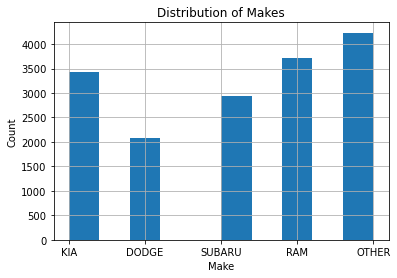

In [66]:
#distribution of makes

df['Make'].hist(bins=10)
plt.title('Distribution of Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.savefig('Distribution of Makes')

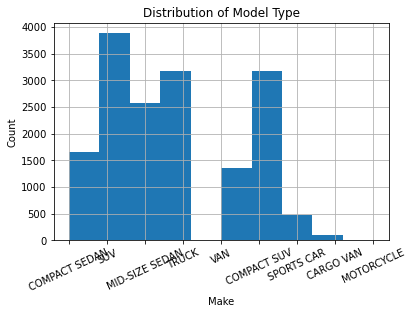

In [68]:
#distribution of model type

df['Model Type'].hist(bins=10)
plt.title('Distribution of Model Type')
plt.xlabel('Make')
plt.xticks(rotation = 25)
plt.ylabel('Count')

plt.savefig('Distribution of Model Type')

In [56]:
df1 = df[['Purchase Year', 'Sale Price']]
df1.head()

,Purchase Year,Sale Price
0,2013,"$17,200.00"
1,2017,"$22,025.00"
2,2012,"$23,500.00"
3,2017,"$24,680.00"
4,2015,"$18,994.00"


In [59]:
df1['Sale Price'] = df1['Sale Price'].str.replace(',', '')
df1['Sale Price'] = df1['Sale Price'].str.replace('$', '')
df1.head()

<ipython-input-59-3e5800343a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sale Price'] = df1['Sale Price'].str.replace(',', '')
<ipython-input-59-3e5800343a42>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['Sale Price'] = df1['Sale Price'].str.replace('$', '')
<ipython-input-59-3e5800343a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,Purchase Year,Sale Price
0,2013,17200.00
1,2017,22025.00
2,2012,23500.00
3,2017,24680.00
4,2015,18994.00


In [63]:
df1['Sale Price'] = df1['Sale Price'].astype(float)

df1.dtypes

<ipython-input-63-1d3bb19912f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sale Price'] = df1['Sale Price'].astype(float)


In [65]:
df1.groupby(['Purchase Year']).sum()

,Sale Price
Purchase Year,
2008,4979875.51
2009,18203371.25
2010,24195745.05
2011,29970160.80
2012,30450015.09
2013,34099845.13
2014,37362244.66
2015,37282147.54
2016,34825920.71
